# Medical Reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn

## Reconstruction using ICP

### ICP implementation

Eh we'll do it later!

### ICP Testing

In [88]:
def randomTransformation2D(maxRot=30, maxTrans=1):
    theta = np.random.uniform(-maxRot, maxRot)
    gamma = np.random.uniform(0, maxTrans)
    
    trans_dir = np.random.uniform(-1, 1, (2, ))
    trans = gamma * trans_dir / np.linalg.norm(trans_dir)
    
    return np.array([
        [np.cos(theta), -np.sin(theta), trans[0]],
        [np.sin(theta),  np.cos(theta), trans[1]],
        [            0.,              0.,       1.]
    ])

def rotate2D(v, trans_mat):
    if v.shape[1] == 2:
        v = np.hstack((v, np.ones((v.shape[0], 1))))
        
    return v.dot(trans_mat)[:, :2]

In [121]:
def gen_square(a=2, center=(0, 0), N=100):
    square = [np.array([a * np.random.uniform(0, 1) - a / 2, a / 2]) for _ in range(N)] \
        + [np.array([a * np.random.uniform(0, 1) - a / 2, - a / 2]) for _ in range(N)] \
        + [np.array([a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N)] \
        + [np.array([- a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N)]
        
    return np.array(square)

In [122]:
square = gen_square(a = 10, N = 200)

random_transform = randomTransformation2D()
rot_square = rotate2D(square, random_transform)

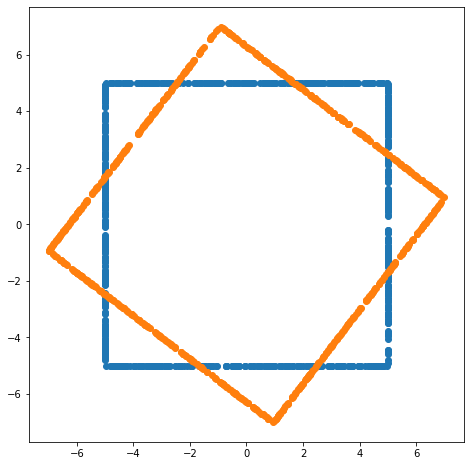

In [123]:
plt.figure(figsize=(16, 8))
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(square[:, 0], square[:, 1])
plt.scatter(rot_square[:, 0], rot_square[:, 1])

In [129]:
from icp import icp

T, dist, num_iterations = icp(square, rot_square, max_iterations=50)
num_iterations

37

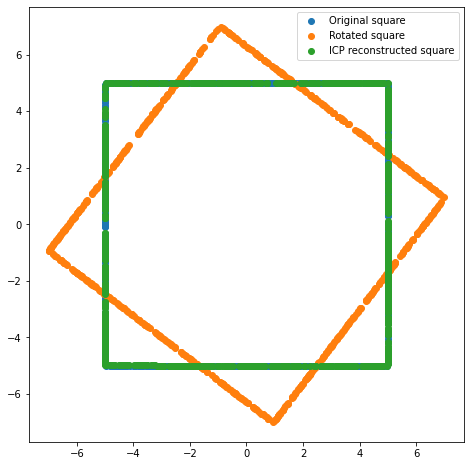

In [130]:
plt.figure(figsize=(16, 8))
plt.gca().set_aspect('equal', adjustable='box')

icp_square = rotate2D(rot_square, T)

plt.scatter(square[:, 0], square[:, 1], label='Original square')
plt.scatter(rot_square[:, 0], rot_square[:, 1], label='Rotated square')
plt.scatter(icp_square[:, 0], icp_square[:, 1], label='ICP reconstructed square')

plt.legend(loc='upper right')